In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('logs.csv')
df.head()

,Algoritmo,Número de Clusters,Número Máximo de Iterações,Centros dos Clusters,Inércia,Coesão,Coeficiente de Silhueta,Rand Score,Homogeneidade,Completude,Entropia,Matriz de Contingência
0,KMEANS,2.0,100,"[[1.3339195427566404, 1.05869421850957, 2.1200...",199292.488867,223.210937,0.275966,0.729135,0.364306,0.367773,8.182,"[[3722, 486], [826, 3090]]"
1,KMEANS,2.0,200,"[[1.3339195427566404, 1.05869421850957, 2.1200...",199292.488867,223.210937,0.275966,0.729135,0.364306,0.367773,8.182,"[[3722, 486], [826, 3090]]"
2,KMEANS,2.0,300,"[[1.3339195427566404, 1.05869421850957, 2.1200...",199292.488867,223.210937,0.275966,0.729135,0.364306,0.367773,8.182,"[[3722, 486], [826, 3090]]"
3,KMEANS,2.0,400,"[[1.3339195427566404, 1.05869421850957, 2.1200...",199292.488867,223.210937,0.275966,0.729135,0.364306,0.367773,8.182,"[[3722, 486], [826, 3090]]"
4,KMEANS,2.0,500,"[[1.3339195427566404, 1.05869421850957, 2.1200...",199292.488867,223.210937,0.275966,0.729135,0.364306,0.367773,8.182,"[[3722, 486], [826, 3090]]"


In [12]:
df_kmeans = df[df['Algoritmo'] == 'KMEANS']

maior_homogeneidade = df_kmeans['Homogeneidade'].idxmax()
maior_homogeneidade = df_kmeans.iloc[maior_homogeneidade]

maior_completude = df_kmeans['Completude'].idxmax()
maior_completude = df_kmeans.iloc[maior_completude]

maior_completude
# maior_homogeneidade


Algoritmo                                                                KMEANS
Número de Clusters                                                          2.0
Número Máximo de Iterações                                                  100
Centros dos Clusters          [[1.3339195427566404, 1.05869421850957, 2.1200...
Inércia                                                           199292.488867
Coesão                                                               223.210937
Coeficiente de Silhueta                                                0.275966
Rand Score                                                             0.729135
Homogeneidade                                                          0.364306
Completude                                                             0.367773
Entropia                                                                  8.182
Matriz de Contingência                               [[3722, 486], [826, 3090]]
Name: 0, dtype: object

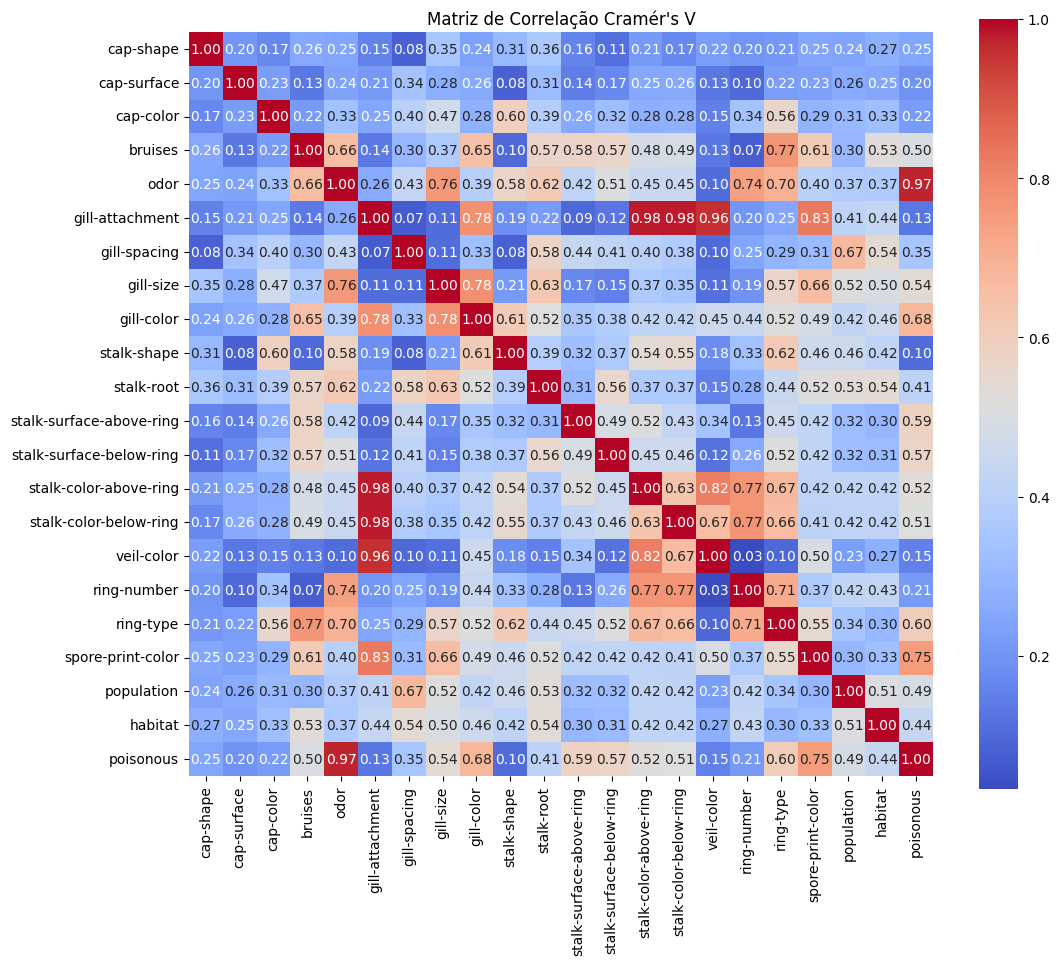

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

# Função para calcular Cramér's V com tratamento de divisões inválidas
def cramers_v(x, y):
    # Cria tabela de contingência
    confusion_matrix = pd.crosstab(x, y)
    
    if confusion_matrix.size == 0:
        return np.nan  # Retorna NaN se a tabela estiver vazia
    
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    
    # Verifica se o denominador é zero para evitar divisão inválida
    denom = n * (min(r - 1, k - 1))
    if denom == 0:
        return np.nan  # Retorna NaN se o denominador for zero
    
    return np.sqrt(chi2 / denom)

# Função para gerar a matriz de correlação
def correlation_ratio_matrix(df):
    cols = df.columns
    corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

    for i in range(len(cols)):
        for j in range(i, len(cols)):
            # Substitui NaN por uma nova categoria "missing"
            x = df.iloc[:, i].fillna('missing')
            y = df.iloc[:, j].fillna('missing')

            corr_matrix.iat[i, j] = cramers_v(x, y)
            corr_matrix.iat[j, i] = corr_matrix.iat[i, j]

    return corr_matrix

# Fetch dataset
mushroom = fetch_ucirepo(id=73)

# Data (as pandas dataframes)
X = pd.DataFrame(mushroom.data.features)  
y = pd.DataFrame(mushroom.data.targets)  

# Concatenando os DataFrames
df = pd.concat([X, y], axis=1)
# df = df.dropna()
df = df.drop(columns='veil-type')

# Gerar matriz de correlação Cramér's V
correlation_matrix = correlation_ratio_matrix(df)

# Imprimir a matriz de correlação

# Plotar a matriz de correlação usando Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação Cramér\'s V')
plt.show()


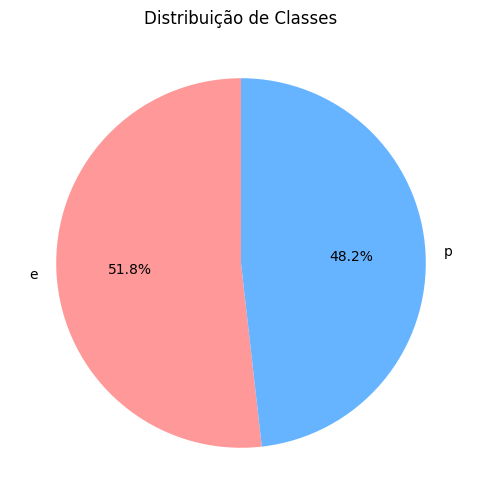

In [19]:
# Contando as ocorrências de cada classe
class_counts = y['poisonous'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.show()